In [5]:
%%javascript
IPython.notebook.get_cells().map( function(c){ return c.code_mirror.options.indentWithTabs = true;});

CodeMirror.defaults.indentWithTabs = true;


<IPython.core.display.Javascript object>

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [37]:
import plotly.express as px

In [7]:
evens = np.array(list(range(0,50,2)))
e_out = evens / 2
odds = np.array(list(range(1,50,2)))
o_out = 3 * odds + 1

In [10]:
%matplotlib notebook

In [18]:
def collatz(val):
	if val%2 == 0: return val/2
	else: return 3*val + 1

In [32]:
def plot_path(val):
	log = math.log2(val)
	p = log if log == int(log) else None
	ptsx = [val]; ptsy = [0]
	while val != 1:
		i = ptsx[-1]
		ptsx.append(i)
		val = collatz(i)
		if not p:
			check_pow = math.log2(val)
			if int(check_pow) == check_pow:
				p = check_pow
		ptsy.append(val)#
		ptsx.append(val); ptsy.append(val)
	#plt.plot(ptsx,ptsy)
	return p

<IPython.core.display.Javascript object>


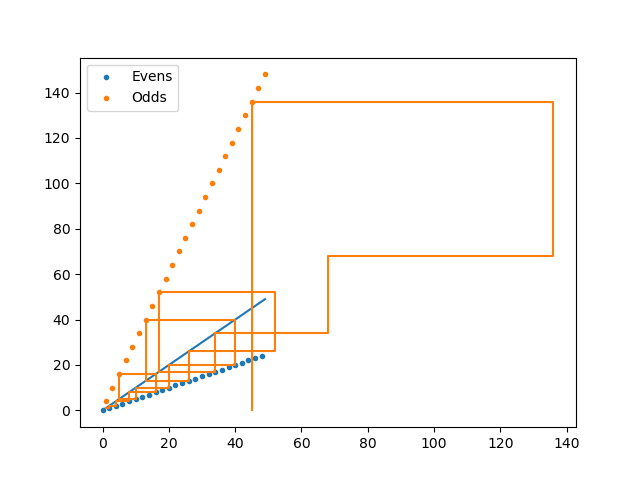

In [24]:
plt.scatter(evens, e_out, label="Evens", marker='.')
plt.plot(range(50),range(50))
plt.scatter(odds, o_out, label="Odds", marker='.')
#for i in range(6):
#	plt.plot([0,50],[2**i,2**i],label=f"2^{i}")
initval = 45
pow_2 = plot_path(initval)

plt.legend()
plt.show()

In [64]:
a = range(3,100)
b = [plot_path(x) for x in a]
px.scatter(x=a,y=b)


In [14]:
import algebra as al
import networkx as nx

In [3]:
def iseven(e):
	if isinstance(e, al.Expression):
		for t in e.terms:
			c = t.coef
			if c%2:
				return False
		return True
	elif isinstance(e, al.Term):
		return e.coef%2 == 0

In [4]:
def isodd(e):
	if isinstance(e, al.Expression):
		for t in e.terms:
			if t.args:
				if t.coef%2:
					return False
				else:
					return not iseven(e)
	elif isinstance(e, al.Term):
		return False

In [5]:
odd = al.Term(2,'k')+al.Term(1)
print(iseven(odd))
print(isodd(odd))


False
True


In [6]:
def ismult3(e):
	if isinstance(e, al.Expression):
		for t in e.terms:
			c = t.coef
			if c%3:
				return False
		return True
	elif isinstance(e, al.Term):
		return e.coef%3 == 0

In [11]:
print(odd*5)

10•k + 5


In [8]:
def root_to_children(e):
	e_m1 = (e - al.Term(1))
	if ismult3(e_m1) and isodd(e_m1):
		return (e_m1/al.Term(3), e*al.Term(2))
	return (e*al.Term(2),)

In [9]:
def to_root(e):
	if iseven(e):
		return e/al.Term(2)
	elif isodd(e):
		return al.Term(3) * e + al.Term(1)


In [10]:
print(root_to_children(odd))


(Expression("Term(4, 'k', 1)", 'Term(2,)'),)


In [163]:
import networkx as nx

In [164]:
def check_from(n):
    if n%3 == 1 and (n//3)%2:
        return (n//3, n*2)
    else:
        return (n*2,)

In [ ]:
def to_root_int(n,length):
	l = [n]
	for i in range(length):
		num = l[-1]
		if not num%2:
			l.append(int(num/2))
		else:
			l.append(num*3+1)
	return l

I noticed that each first non-trivial(odd) split from a root node, mod root node, remains equal

In [205]:
to_root_int(21,20)

[21, 64, 32, 16, 8, 4, 2, 1, 4, 2, 1, 4, 2, 1, 4, 2, 1, 4, 2, 1, 4]

In this case, 52 splits into 17 and 104. Each odd split mod 52 = 17mod 52

In [219]:
print('i','52 in l','1 in l')
for i in range(17, 1000, 52):
	l = to_root_int(i, 1000)
	print(i,52 in l, 1 in l)

i 52 in l 1 in l
17 True True
69 True True
121 False True
173 True True
225 True True
277 True True
329 True True
381 False True
433 False True
485 False True
537 False True
589 False True
641 True True
693 True True
745 True True
797 False True
849 False True
901 True True
953 False True


From above I noticed not all 17 mod 52 come from 52. 121 = 17mod 52, but does not come from 52. The below shows me that 121 comes from some other branch, through 53, to 16

In [216]:
j=50
ll = to_root_int(381, j)
while 52 not in ll:
	j += 10
	ll = to_root_int(121, j)
	if 1 in ll: break
print(ll)


[121, 364, 182, 91, 274, 137, 412, 206, 103, 310, 155, 466, 233, 700, 350, 175, 526, 263, 790, 395, 1186, 593, 1780, 890, 445, 1336, 668, 334, 167, 502, 251, 754, 377, 1132, 566, 283, 850, 425, 1276, 638, 319, 958, 479, 1438, 719, 2158, 1079, 3238, 1619, 4858, 2429, 7288, 3644, 1822, 911, 2734, 1367, 4102, 2051, 6154, 3077, 9232, 4616, 2308, 1154, 577, 1732, 866, 433, 1300, 650, 325, 976, 488, 244, 122, 61, 184, 92, 46, 23, 70, 35, 106, 53, 160, 80, 40, 20, 10, 5, 16, 8, 4, 2, 1, 4, 2, 1, 4, 2]


So essentially: if a number n is a first odd split from some root r, (each first odd split from r) % r  = n%r.
The converse is not true, ie, given a first odd split n from r, not all integers which are equal to n%r will come from r.

In [210]:
121%52

17

In [185]:
def rep_val(k):
	return k

In [186]:
l = [1]
d2 = {1:[2]}
for k in l:
	rep_k = rep_val(k)
	for val in d2[rep_k]:
		if not (rep_val(val) in d2):
			d2[rep_val(val)] = check_from(val)
			l.append(val)
	if len(d2) >= 100: break
for k in d2:
	d2[k] = [rep_val(num) for num in d2[k]]


dG = nx.DiGraph(d2)
nx.set_node_attributes(dG, 0, 'connections')


In [187]:
d2

{1: [2],
 2: [4],
 4: [1, 8],
 8: [16],
 16: [5, 32],
 5: [10],
 32: [64],
 10: [3, 20],
 64: [21, 128],
 3: [6],
 20: [40],
 21: [42],
 128: [256],
 6: [12],
 40: [13, 80],
 42: [84],
 256: [85, 512],
 12: [24],
 13: [26],
 80: [160],
 84: [168],
 85: [170],
 512: [1024],
 24: [48],
 26: [52],
 160: [53, 320],
 168: [336],
 170: [340],
 1024: [341, 2048],
 48: [96],
 52: [17, 104],
 53: [106],
 320: [640],
 336: [672],
 340: [113, 680],
 341: [682],
 2048: [4096],
 96: [192],
 17: [34],
 104: [208],
 106: [35, 212],
 640: [213, 1280],
 672: [1344],
 113: [226],
 680: [1360],
 682: [227, 1364],
 4096: [1365, 8192],
 192: [384],
 34: [11, 68],
 208: [69, 416],
 35: [70],
 212: [424],
 213: [426],
 1280: [2560],
 1344: [2688],
 226: [75, 452],
 1360: [453, 2720],
 227: [454],
 1364: [2728],
 1365: [2730],
 8192: [16384],
 384: [768],
 11: [22],
 68: [136],
 69: [138],
 416: [832],
 70: [23, 140],
 424: [141, 848],
 426: [852],
 2560: [853, 5120],
 2688: [5376],
 75: [150],
 452: [904],
 

In [169]:
pic = nx.drawing.nx_pydot.to_pydot(dG)
pic.write_png('tree2.png')

In [181]:
odd = al.Term(2,'k') + al.Term(1)

In [182]:
def make_graph_to_children(odd):
	l3 = [str(odd)]
	d3 = {str(odd):root_to_children(odd)}
	for k in l3:
		for val in d3[k]:
			s_val = str(val)
			if not (s_val in d3):
				d3[s_val] = root_to_children(val)
				l3.append(s_val)
		if len(d3) >= 100: break
	d4 = {}
	for k in d3:
		d4[k] = tuple(str(x) for x in d3[k])
	return d4
d4 = make_graph_to_children(odd)
dG2 = nx.DiGraph(d4)

In [183]:
d4

{'2•k + 1': ('4•k + 2',),
 '4•k + 2': ('8•k + 4',),
 '8•k + 4': ('16•k + 8',),
 '16•k + 8': ('32•k + 16',),
 '32•k + 16': ('64•k + 32',),
 '64•k + 32': ('128•k + 64',),
 '128•k + 64': ('256•k + 128',),
 '256•k + 128': ('512•k + 256',),
 '512•k + 256': ('1024•k + 512',),
 '1024•k + 512': ('2048•k + 1024',),
 '2048•k + 1024': ('4096•k + 2048',),
 '4096•k + 2048': ('8192•k + 4096',),
 '8192•k + 4096': ('16384•k + 8192',),
 '16384•k + 8192': ('32768•k + 16384',),
 '32768•k + 16384': ('65536•k + 32768',),
 '65536•k + 32768': ('131072•k + 65536',),
 '131072•k + 65536': ('262144•k + 131072',),
 '262144•k + 131072': ('524288•k + 262144',),
 '524288•k + 262144': ('1048576•k + 524288',),
 '1048576•k + 524288': ('2097152•k + 1048576',),
 '2097152•k + 1048576': ('4194304•k + 2097152',),
 '4194304•k + 2097152': ('8388608•k + 4194304',),
 '8388608•k + 4194304': ('16777216•k + 8388608',),
 '16777216•k + 8388608': ('33554432•k + 16777216',),
 '33554432•k + 16777216': ('67108864•k + 33554432',),
 '6710

In [184]:
def make_chain_to_root(odd):
	l5 = [odd]
	for x in range(11):
		v = to_root(l5[-1])
		if v:
			l5.append(v)
		else: break
	return l5
l5 = make_chain_to_root(odd)
print(*l5)

2•k + 1 6•k + 4 3.0•k + 2.0


In [189]:
d5 = make_graph_to_children(al.Term(2,'k')+al.Term(1))
d5

{'2•k + 1': ('4•k + 2',),
 '4•k + 2': ('8•k + 4',),
 '8•k + 4': ('16•k + 8',),
 '16•k + 8': ('32•k + 16',),
 '32•k + 16': ('64•k + 32',),
 '64•k + 32': ('128•k + 64',),
 '128•k + 64': ('256•k + 128',),
 '256•k + 128': ('512•k + 256',),
 '512•k + 256': ('1024•k + 512',),
 '1024•k + 512': ('2048•k + 1024',),
 '2048•k + 1024': ('4096•k + 2048',),
 '4096•k + 2048': ('8192•k + 4096',),
 '8192•k + 4096': ('16384•k + 8192',),
 '16384•k + 8192': ('32768•k + 16384',),
 '32768•k + 16384': ('65536•k + 32768',),
 '65536•k + 32768': ('131072•k + 65536',),
 '131072•k + 65536': ('262144•k + 131072',),
 '262144•k + 131072': ('524288•k + 262144',),
 '524288•k + 262144': ('1048576•k + 524288',),
 '1048576•k + 524288': ('2097152•k + 1048576',),
 '2097152•k + 1048576': ('4194304•k + 2097152',),
 '4194304•k + 2097152': ('8388608•k + 4194304',),
 '8388608•k + 4194304': ('16777216•k + 8388608',),
 '16777216•k + 8388608': ('33554432•k + 16777216',),
 '33554432•k + 16777216': ('67108864•k + 33554432',),
 '6710

In [59]:
def coef_and_const(e):
	for t in e.terms:
		if t.args:
			coef = t.coef
			var = t.args[0]
		else:
			const = t.coef
	return coef, const, var

In [60]:
def sim_modular_forms(e,length):
	l = [e]
	for k in l:
		coef, const, var = coef_and_const(k)
		e1,e2 = al.Term(coef*2,var) + al.Term(const), al.Term(coef*2,var) + al.Term(const+coef)
		if len(l) >= length: break
		if e1 not in l:
			l.extend([e1,e2])
	return l

In [97]:
ts = sim_modular_forms(al.Term(4,'k')+al.Term(3),50)
for tt in ts: print(tt)

4•k + 3
8•k + 3
8•k + 7
16•k + 3
16•k + 11
16•k + 7
16•k + 15
32•k + 3
32•k + 19
32•k + 11
32•k + 27
32•k + 7
32•k + 23
32•k + 15
32•k + 31
64•k + 3
64•k + 35
64•k + 19
64•k + 51
64•k + 11
64•k + 43
64•k + 27
64•k + 59
64•k + 7
64•k + 39
64•k + 23
64•k + 55
64•k + 15
64•k + 47
64•k + 31
64•k + 63
128•k + 3
128•k + 67
128•k + 35
128•k + 99
128•k + 19
128•k + 83
128•k + 51
128•k + 115
128•k + 11
128•k + 75
128•k + 43
128•k + 107
128•k + 27
128•k + 91
128•k + 59
128•k + 123
128•k + 7
128•k + 71
128•k + 39
128•k + 103


In [85]:
print(al.Term(1024,'k')+al.Term(341) in ts[150:])

False


In [90]:
def ismult(n, e):
	return all([not (x.coef%n) for x in e.terms])

In [96]:
print(
ismult(4,(al.Term(16384, 'k') + al.Term(5461)) - al.Term(3))
)

False
